In [34]:
%%html
<style>
  table {margin-left: 10px !important;}
</style>

# Dependency of inter-gap spacing on acceleration in a multigap cavity

#### Explanation of plots
* 5 gaps with equal spacing
* 5 gaps with equal field disribution (dotted blue curve)
* longitudinal axis (abscissa) normalized to $\beta\lambda$
* particle velocity $\beta$ kept constant, i.e. acceleration neglected
* particle passes center of 1st gap with given phase (see legend) as parameter ($\varphi$-sync)
* upper plot: gap spacing exatly $\beta\lambda$
* lower plot: gap spacing increased by 10%
* dotted black curve shows field seen by particle when moving along abscissa with -45 deg synchronous phase

#### Discussion
* upper plot: the particle is in complete synchronism with the inter-gap spacing. The distance 
    from one gap to the next gap is exactly $\beta\lambda$ (in nomalized abscissa 1). Therefore the
    particle sees always positve fields and is always accelerated.
* lower plot: the inter-gap spacing has been increased by 10%. The particle looses synchronism
    because it travels less distance (always $\beta\lambda$) during a RF-cycle than the spacing between the gaps.
    That means it arrives later at downstream gaps, i.e. it crosses the gap center at larger phases
    than the synchronous phase. As a consquence the net acceleration in the 4th gap is much reduced and
    in the 5th gap it sees a net deacceleration.
* of course the whole dynamics is more complicated because the particle changes velocity due 
to acceleration. To see a more realistic picture without the $\beta$=constant approximation a Runge-Kutta integration is needed.

#### The math that is used
The longitudinal position $s$ is taken as independent variable. Time $t$ becomes dependent variable. $s$
is measured in units of $\beta\lambda$. We assume the field profile $ng(s)$ to be a gaussian normal distribution 
and to be periodic $ng(u+1)=ng(u)$.

|  |  |
| :--------------------------------------------------- | :--------------------------------------- |
| longitudinal position | $s = v*t={\beta}c*t=\beta\lambda*\nu*t$ |
| normalizing | $u=s/\beta\lambda, t'=\nu*t \quad \Rightarrow u=t'$ |
| rf-phase | $\phi = \varphi_0 + \omega * t=\varphi_0+\omega/\nu*t'=\varphi_0+2\pi*u$ 
| electric field is product with separated variables | $E(s,t) = \cos(\phi)*ng(s/\beta\lambda)$ |   
| synchronous phase | $-\pi/2<\varphi_o<\pi/2$ |

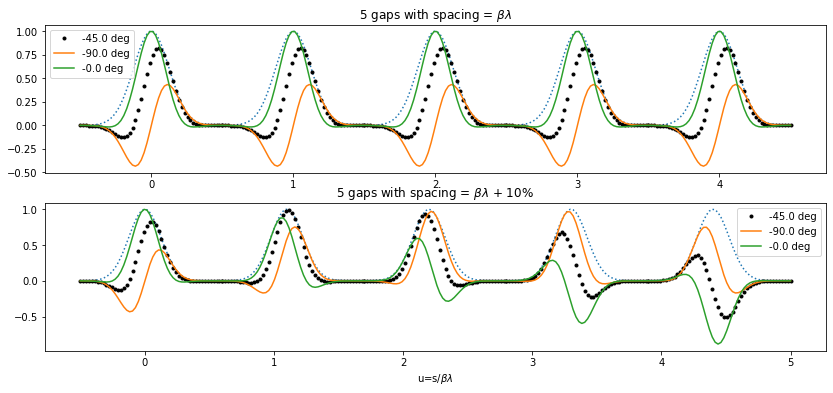

In [2]:
import matplotlib.pyplot as PLT
import math as M
import numpy as NP
from scipy.stats import norm
import scipy.constants as C

pi      = M.pi
twopi   = pi+pi
# threepi = twopi+pi
# fourpi  = threepi+pi
 
# cl    = C.c
# freq  = 816e6
# lamb  = cl/freq
# omega = twopi*freq
# m0c2  = C.value('proton mass energy equivalent in MeV')
# tk    = 50   # kin. energy
# gamma =  1.+tk/m0c2
# beta  = M.sqrt(1. - 1./gamma**2)
# blamb = beta*lamb

# print(" \
#     c-light [m/s]....... {0:G} \n \
#     freq [Hz]..........  {1:G} \n \
#     omega [Hz].........  {3:G} \n \
#     rest mass [MeV]..... {4:G} \n \
#     kin energy [Mev].... {5:G} \n \
#     gamma []............ {6:G} \n \
#     beta []............. {7:G} \n \
#     lambda [m].......... {2:G} \n \
#     beta-lambda [m]..... {8:G} \
# ".format(cl,freq,lamb,omega,m0c2,tk,gamma,beta,blamb))
# print(omega*lamb/cl/twopi)

def generate_space_part(delta=0.0):
    gn,gsig     = (5,  0.125)   # nb gaps, gap sigma
    glen        = 1.0           # interval length
    gstart      = -glen/2.
    # concatenate several gaps
    y = NP.array([])
    x = NP.array([])
    xstart = gstart
    for n in range(gn):
        xstop  = xstart + glen*(1.+delta/100.)
        xrange = NP.linspace(xstart, xstop, 50)
        xpos   = (xstart+glen/2.)
        yy     = M.sqrt(twopi)*gsig * norm.pdf(xrange,xpos,gsig)
        x      = NP.concatenate((x,xrange))
        y      = NP.concatenate((y,yy))        # space part
        xstart = xstop
    return x,y

phi = lambda u: twopi*u+p0

fig = PLT.figure(figsize=(14.,6.))      # prep plotting

phisoll = [-45.0,-90.0,-0.0]
x,y = generate_space_part(delta=0.0)    # gap positions
splt = PLT.subplot(211)
PLT.title(r'5 gaps with spacing = $\beta\lambda$')
PLT.plot(x,y,':')
for p in phisoll:
    p0 = M.radians(p)
    Eup = NP.array([])
    for i,u in enumerate(x):
        v = M.cos(phi(u))*y[i]
        Eup = NP.append(Eup,[v])
    fmt = 'ok' if p == phisoll[0] else '-'
    PLT.plot(x,Eup,fmt,label=f'{p:+3.1f} deg',markersize=3)
PLT.legend()

x,y = generate_space_part(delta=+10.0)    # gap positions +10%
splt = PLT.subplot(212)
PLT.title(r'5 gaps with spacing = $\beta\lambda$ + 10%')
PLT.plot(x,y,':')
for p in phisoll:
    p0 = M.radians(p)
    Eup = NP.array([])
    for i,u in enumerate(x):
        v = M.cos(phi(u))*y[i]
        Eup = NP.append(Eup,[v])
    fmt = 'ok' if p == phisoll[0] else '-'
    PLT.plot(x,Eup,fmt,label=f'{p:+3.1f} deg',markersize=3)
PLT.legend()
splt.set_xlabel(r'u=s/$\beta\lambda$')

PLT.show()

##### W.-D. Klotz 15.08.2022